<a href="https://colab.research.google.com/github/sbbwoy/BDA/blob/main/%EB%B9%85%EB%B6%84%EB%B0%A9_3_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# library for regression
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# 그래프 배경화면을 격자 회색으로 설정
sns.set_theme(color_codes = True)

mydata = datasets.load_diabetes()
df = pd.DataFrame(mydata['data'], columns = mydata['feature_names'])

# target column 추가
df['diabetes_score'] = mydata['target']

df.head()
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
Y = df[['diabetes_score']]

import statsmodels.api as sm
X = sm.add_constant(X)  # intercept 항 추가
model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         diabetes_score   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           3.83e-62
Time:                        04:04:07   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* **R²: 전체 y의 변동량 중에 모델이 설명하는 비율**

* **α: type 1 error(H0이 참인데 기각하는 경우)의 최대 허용 한계**

##4. Classification

목표: Y가 categorical data인 경우 x를 이용해 Y를 잘 분류할 수 있는 calssifier를 잘 구축하는 것

Regression과의 차이점: classification의 경우 OLS를 이용할 수 없어 loss functino을 이용해 model fitting을 다른 방식으로 진행

###1. logistic regression

: 종속변수(y)가 이항적인 상황에서(범주형 변수인 상황) 적용할 수 있는 방법

-------------------------------
Terminology

* logit: (0~1)이 아니라) 실수 전체의 범위에서 어떤 클래스에 속할 확률을 결정하는 함수

* odds: '실패(0)'에 대한 '성공(1)'의 비율
* 연결함수(log odds, logit function): 계산 결과가 확률로 나오기 위해 logit의 값을 입력받아 확률로 변환하는 함수

-------------------------------

확률 p는 데이터의 정보를 반영해 target이 1이 될 확률

image.png


####확률 log odds

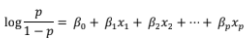

log odds가 X의 linear model. 0<p<1이며, 

image.png

-∞< Χβ < ∞ 를 가지게 된다.

0 <= p <= 1 와 -∞< Χβ < ∞ 의 범위를 연결하기 위해 link function이 필요함

-> logit function (in logistic regression)

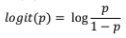

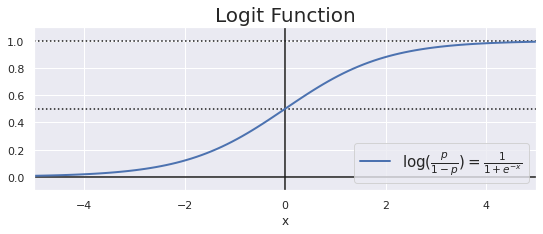

In [8]:
x = np.linspace(-5, 5, 100)
odds = 1 / (1+np.exp(-x))
plt.figure(figsize=(9, 3))
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [0.5, 0.5], 'k:')
plt.plot([-5, 5], [1, 1], 'k:')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(x, odds, 'b-', linewidth=2, label=r'$\log(\frac{p}{1-p}) = \frac{1}{1+e^{-x}}$')
plt.xlabel('x')
plt.title('Logit Function', fontsize=20)
plt.legend(loc='lower right', fontsize=15)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

따라서, log odds에서

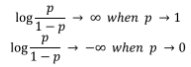

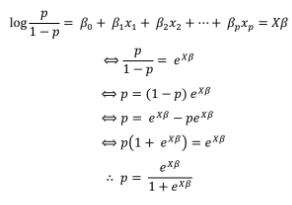




In [38]:
math = pd.read_csv('http://home.ewha.ac.kr/~josong/dm/mathcat.data', sep = '\s+')
math.head()

,hsgpa,hsengl,hscalc,course,passed,outcome
1,78.0,80,Yes,Mainstrm,No,Failed
2,66.0,75,Yes,Mainstrm,Yes,Passed
3,80.2,70,Yes,Mainstrm,Yes,Passed
4,81.7,67,Yes,Mainstrm,Yes,Passed
5,86.8,80,Yes,Mainstrm,Yes,Passed


hscalc, course, paseed, outcome은 categorical bariable로 label encoding이 필요함

In [39]:
from sklearn.preprocessing import LabelEncoder
items = math.columns[2:6]
le = LabelEncoder()

for i in items:
    math[i] = le.fit_transform(math[i])

math.head()

,hsgpa,hsengl,hscalc,course,passed,outcome
1,78.0,80,1,2,0,1
2,66.0,75,1,2,1,2
3,80.2,70,1,2,1,2
4,81.7,67,1,2,1,2
5,86.8,80,1,2,1,2


In [40]:
X = math.iloc[:, :4]
y = math.iloc[:, 4]

In [41]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X, y)

LogisticRegression()

In [42]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(lg.predict(X), y)
cmat

array([[ 96,  41],
       [ 62, 195]])

96(NO)명과 195(Yes)명에 대해서는 올바르게 추정 but 62명과 41명에 대해 잘못 분류

**Regression 모형 적합이 끝나고 나면 반드시 observed(관측치) vs fitted(예측치) plot을 통해 모형 적합이 잘 되었는지 확인하는 것이 필요함**

classifiaction에서는 모형 적합이 끝나면 confunsion matrxi를 만들어 모형성능을 판단



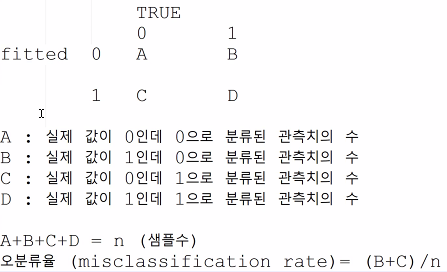

In [43]:
#misclass rate
missclass_rate = (cmat[0, 1] + cmat[1, 0]) / (sum(sum(cmat)))
missclass_rate

0.2614213197969543

In [44]:
def range_with_float(start, stop, step):
    while stop > start:
        yield start
        start += step

In [45]:
#class1에 속할 확률, [:, 0]인 경우 class0에 속할 확률
prob = lg.predict_proba(X)[:, 1]

result_list = []
result_dic = {}

n = len(math)

#최소의 오분류율을 만드는 경계확률을 찾는 반복문
for i in range_with_float(0.4, 0.601, 0.001):
    for j in range(0, n):
        #경계확률보다 크면 class 1로 분류, 아니면 0
        if prob[j] >= 1:    result_list.append(1)
        else:               result_list.append(0)

    #오분류율을 구하기 위해 필요한 confusion matrix
    cmap = confusion_matrix(result_list, y)

    #오분류율 계산
    missrate = (cmat[0, 1] + cmat[1, 0]) / (sum(sum(cmat)))

    #dictionary에 경계확률을 key로 오분류율을 value로 저장
    result_dic[round(i, 3)] = round(missrate, 4)

    result_list = []

In [46]:
print(f'최소의 오분류율은 {min(result_dic.values())} 이며 이때의 경계확률을 {min(result_dic, key = result_dic.get)}이다. ')

최소의 오분류율은 0.2614 이며 이때의 경계확률을 0.4이다. 


cf) sklearn.statsmodels

In [48]:
import statsmodels.api as sm

#intercept항 추가
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.541498
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 passed   No. Observations:                  394
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            4
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.1959
Time:                        06:25:10   Log-Likelihood:                -213.35
converged:                       True   LL-Null:                       -265.33
Covariance Type:            nonrobust   LLR p-value:                 1.414e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.9044      2.122     -7.496      0.000     -20.063     -11.746
hsgpa          0.2249      0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
print('< model parameters >')
print(model.params)
print()
print('< t-values >')
print(model.tvalues)

< model parameters >
const    -15.904385
hsgpa      0.224870
hsengl    -0.042997
hscalc     1.503545
course     0.218498
dtype: float64

< t-values >
const    -7.495955
hsgpa     7.554576
hsengl   -2.463628
hscalc    2.260020
course    1.022811
dtype: float64


**cf. GLM(generalized linear model)**

* 앞서 유도한 로지스틱 모형에서 target은 1에 대한 log odds 값
* 실제 관측치는 log odds값이 아닌 출력값(target= 0 or 1)
* 이 결과를 fitting하기 위해선 logistic regression은 선형회귀를 확장한 일반화선형모형(GLM)의 special case

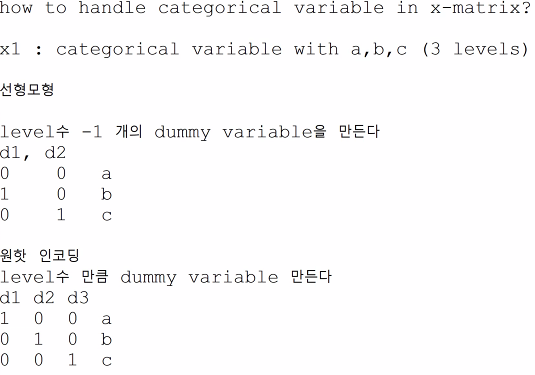